# Working with R

>R as a default has a base package that contains many operational, mathematical, statistical, and graphical functions that are sufficient to start working immediately. However, R has a great user contribution platform with thousands of packages directed toward specific applications

## How to install an R package.

* From Rstudio
* directly from the command line 
	
	install.packages("Package.name")

For more info on installing packages see [http://jtleek.com/modules/01_DataScientistToolbox/02_09_installingRPackages/#1](http://jtleek.com/modules/01_DataScientistToolbox/02_09_installingRPackages/#1)

In [1]:
install.packages("lattice")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


### Once a package is installed you need to load it at each new session to have it active

In [2]:
library(lattice)

### The function demo is a good way to see what the package is capable of 
* Not all packages have a built in demo

#### To see which installed packages have demos you can run the command

In [3]:
demo(package = .packages(all.available = TRUE))



	demo(lattice)
	---- ~~~~~~~

> require(grid)


Loading required package: grid



> old.prompt <- devAskNewPage(TRUE)

> ## store current settings, to be restored later
> old.settings <- trellis.par.get()

> ## changing settings to new 'theme'
> trellis.par.set(theme = col.whitebg())

> ## simulated example, histogram and kernel density estimate superposed
> x <- rnorm(500)

> densityplot(~x)

> histogram(x, type = "density", 
+           panel = function(x, ...) {
+               panel.histogram(x, ...) 
+               panel.densityplot(x, col = "brown", plot.points = FALSE)
+           })


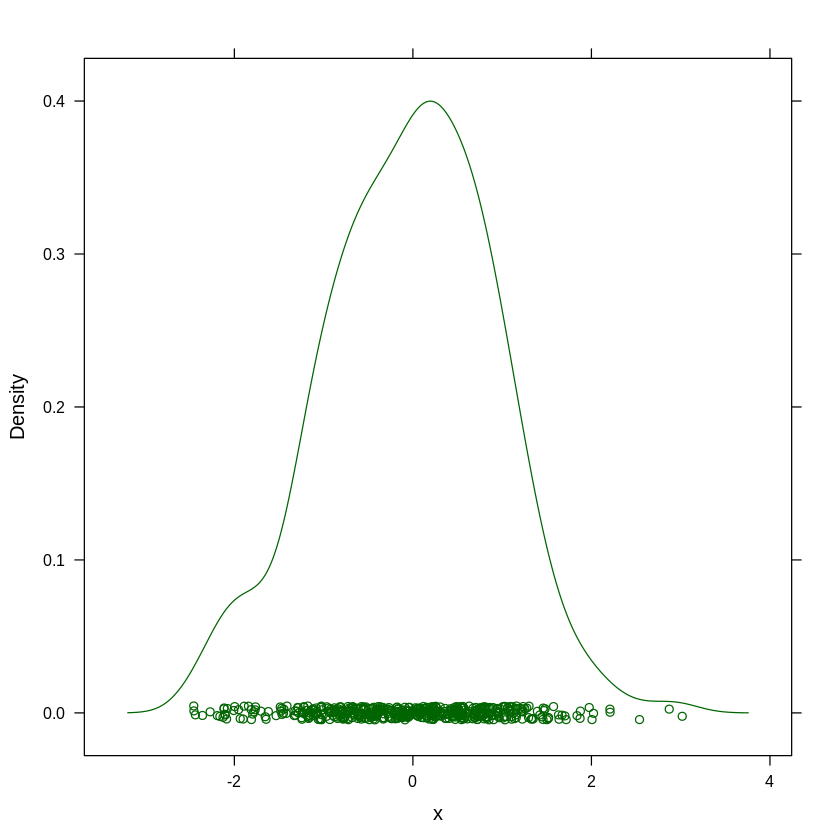


> ## Using a custom panel function to superpose a fitted normal density
> ## on a Kernel Density Estimate
> 
> densityplot( ~ height | voice.part, data = singer, layout = c(2, 4),  
+             xlab = "Height (inches)",
+             ylab = "Kernel Density\n with Normal Fit",
+             main = list("Estimated Density", cex = 1.4, col = "DarkOliveGreen"),
+             panel = function(x, ...) {
+                 panel.densityplot(x, ...)
+                 panel.mathdensity(dmath = dnorm,
+                                   args = list(mean=mean(x),sd=sd(x)))
+             } )


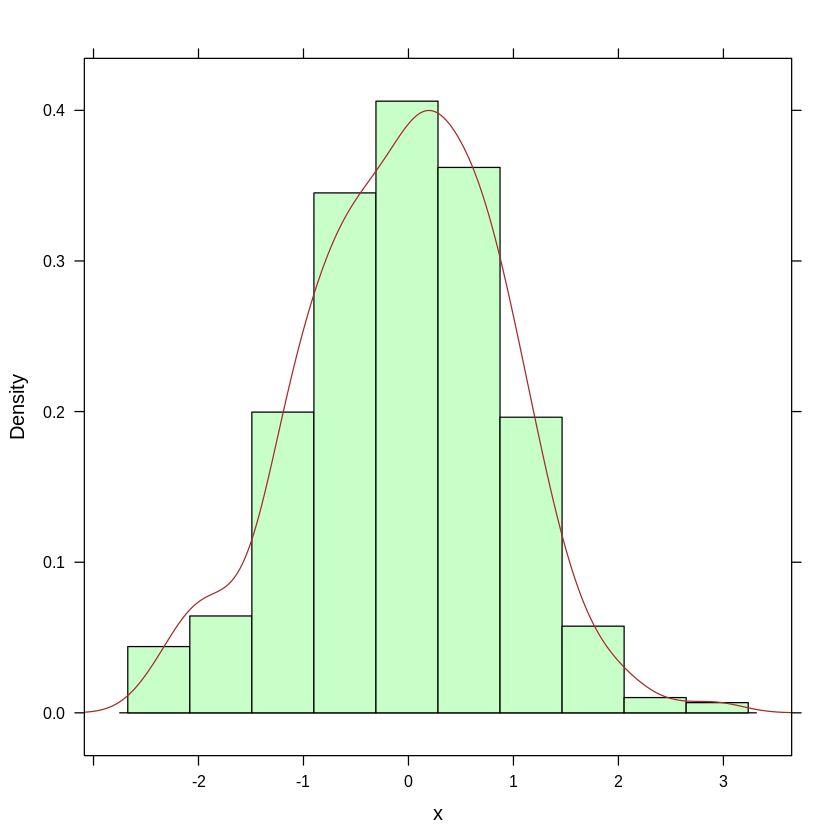


> ## user defined panel functions and fonts
> 
> states <- data.frame(state.x77,
+                      state.name = dimnames(state.x77)[[1]], 
+                      state.region = factor(state.region)) 

> xyplot(Murder ~ Population | state.region, data = states, 
+        groups = state.name,
+        panel = function(x, y, subscripts, groups)  
+        ltext(x = x, y = y, labels = groups[subscripts],
+              cex=.9, fontfamily = "HersheySans", fontface = "italic"),
+        par.strip.text = list(cex = 1.3, font = 4, col = "brown"),
+        xlab = list("Estimated Population, July 1, 1975", font = 2),
+        ylab = list("Murder Rate (per 100,000 population), 1976", font = 2),
+        main = list("Murder Rates in US states", col = "brown", font = 4))


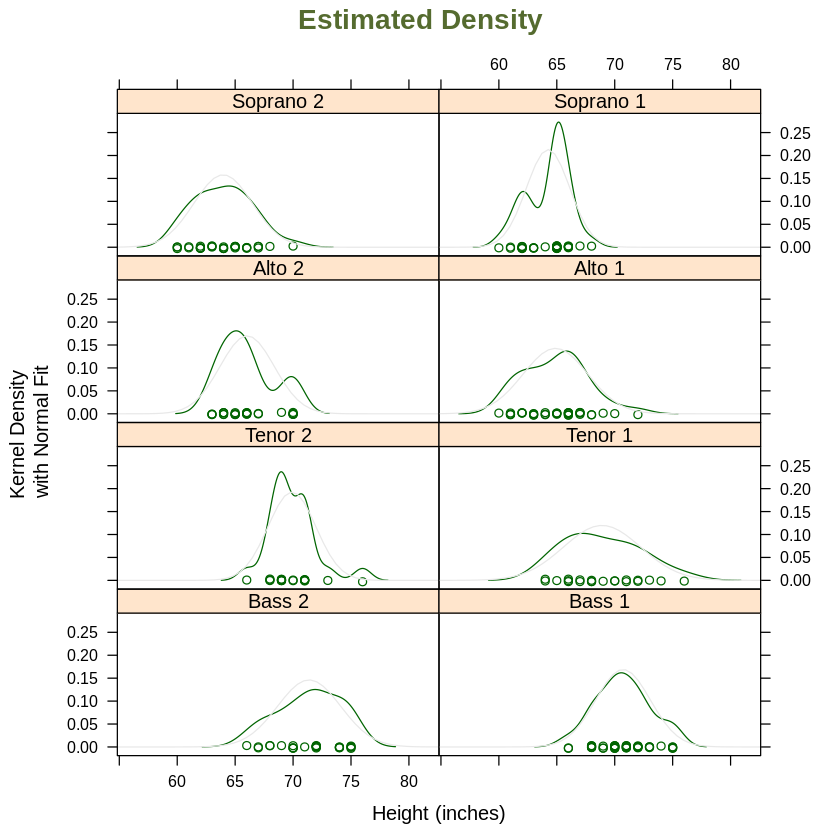


> ##graphical parameters for xlab etc can also be changed permanently
> trellis.par.set(list(par.xlab.text = list(font = 2),
+                      par.ylab.text = list(font = 2),
+                      par.main.text = list(font = 4, col = "brown")))

> ## Same with some multiple line text
> levels(states$state.region) <-
+     c("Northeast", "South", "North\n Central",  "West")

> xyplot(Murder  ~ Population | state.region, data = states,
+        groups = as.character(state.name),
+        panel = function(x, y, subscripts, groups)
+        ltext(x = x, y = y, labels = groups[subscripts], srt = -50, col = "blue",
+              cex=.9, fontfamily = "HersheySans"),
+        par.strip.text = list(cex = 1.3, font = 4, col = "brown", lines = 2),
+        xlab = "Estimated Population\nJuly 1, 1975", 
+        ylab = "Murder Rate \n(per 100,000 population)\n 1976", 
+        main = "Murder Rates in US states")


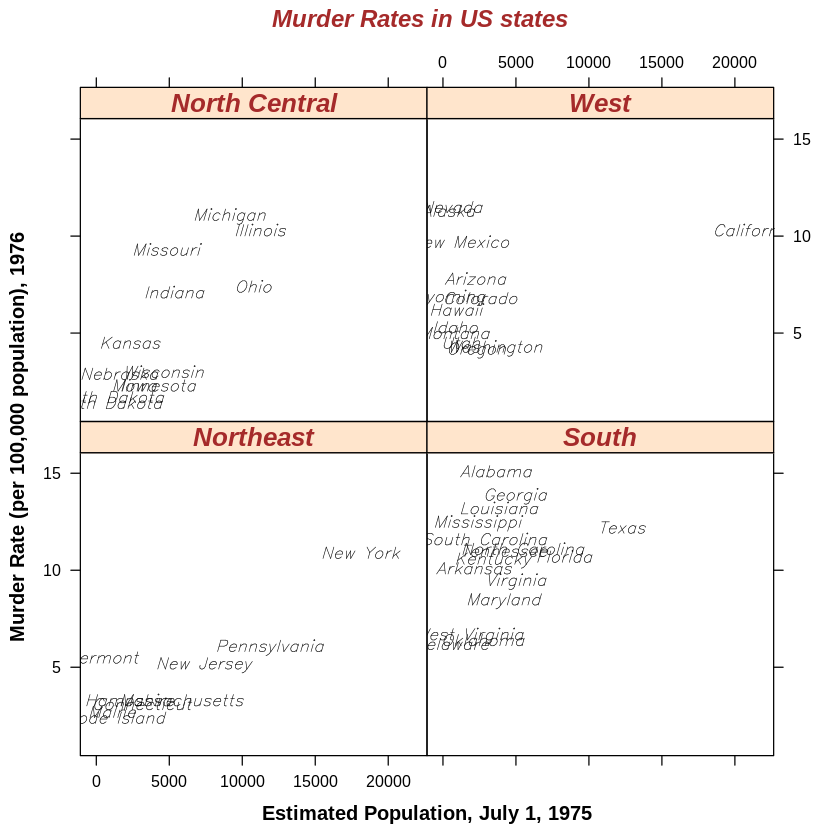


> ##setting these back to their defaults
> trellis.par.set(list(par.xlab.text = list(font = 1),
+                      par.ylab.text = list(font = 1),
+                      par.main.text = list(font = 2, col = "black")))

> ##levelplot
> 
> levelplot(volcano, colorkey = list(space = "top"),
+           sub = "Maunga Whau volcano", aspect = "iso")


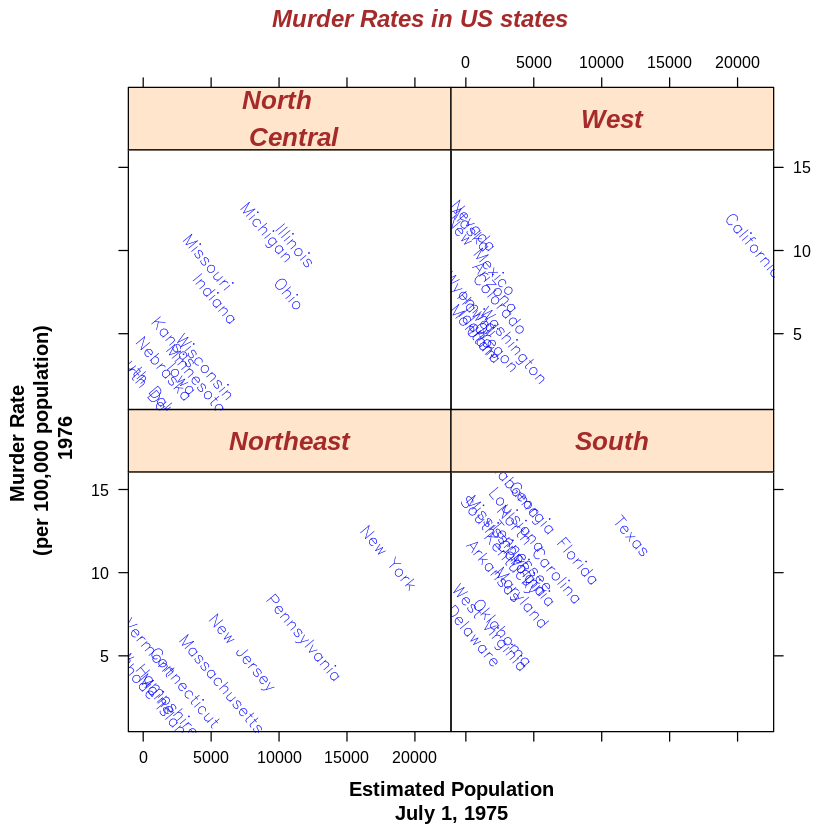


> ## wireframe
> wireframe(volcano, shade = TRUE,
+           aspect = c(61/87, 0.4),
+           screen = list(z = -120, x = -45),
+           light.source = c(0,0,10), distance = .2,
+           shade.colors.palette = function(irr, ref, height, w = .5)
+           grey(w * irr + (1 - w) * (1 - (1-ref)^.4)))


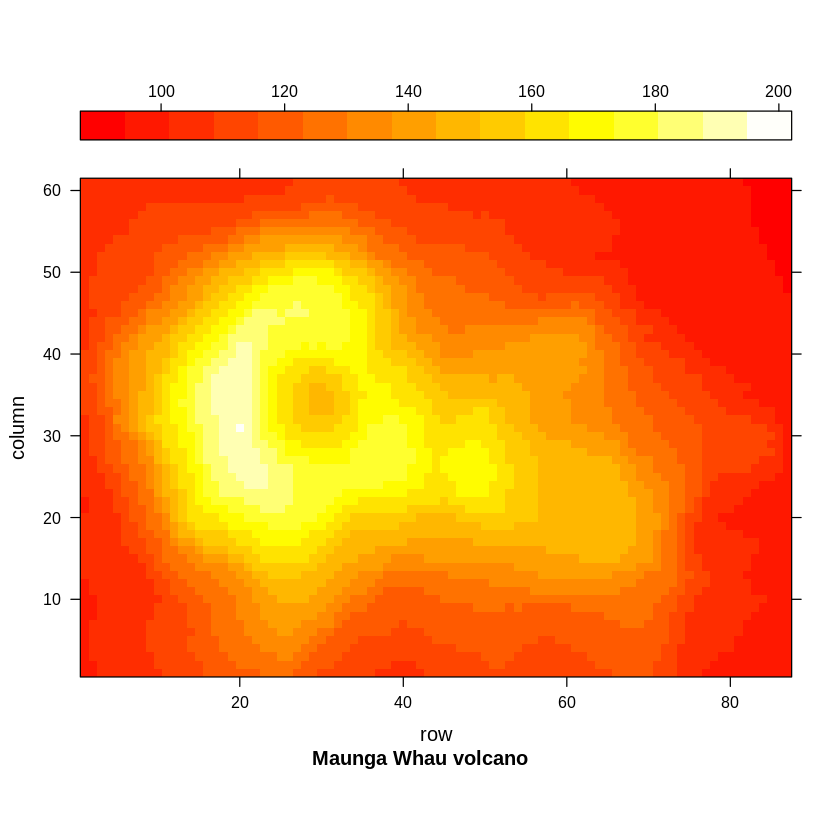


> ## 3-D surface parametrized on a 2-D grid
> 
> n <- 50

> tx <- matrix(seq(-pi, pi, length.out = 2*n), 2*n, n)

> ty <- matrix(seq(-pi, pi, length.out = n) / 2, 2*n, n, byrow = T)

> xx <- cos(tx) * cos(ty)

> yy <- sin(tx) * cos(ty)

> zz <- sin(ty)

> zzz <- zz

> zzz[,1:12 * 4] <- NA

> wireframe(zzz ~ xx * yy, shade = TRUE, light.source = c(3,3,3))


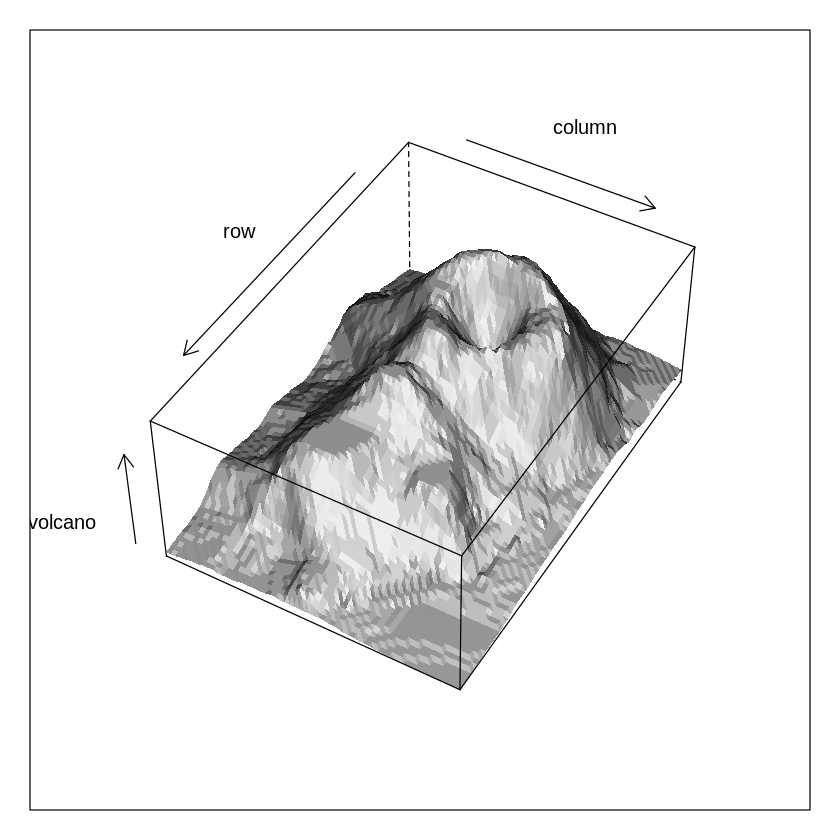


> ## Example with panel.superpose. 
> 
> xyplot(Petal.Length~Petal.Width, data = iris, groups=Species, 
+        panel = panel.superpose,
+        type = c("p", "smooth"), span=.75,
+        col.line = trellis.par.get("strip.background")$col,
+        col.symbol = trellis.par.get("strip.shingle")$col,
+        key = list(title = "Iris Data", x = .15, y=.85, corner = c(0,1),
+            border = TRUE, 
+            points = list(col=trellis.par.get("strip.shingle")$col[1:3],
+            pch = trellis.par.get("superpose.symbol")$pch[1:3],
+            cex = trellis.par.get("superpose.symbol")$cex[1:3]
+            ),
+            text = list(levels(iris$Species))))


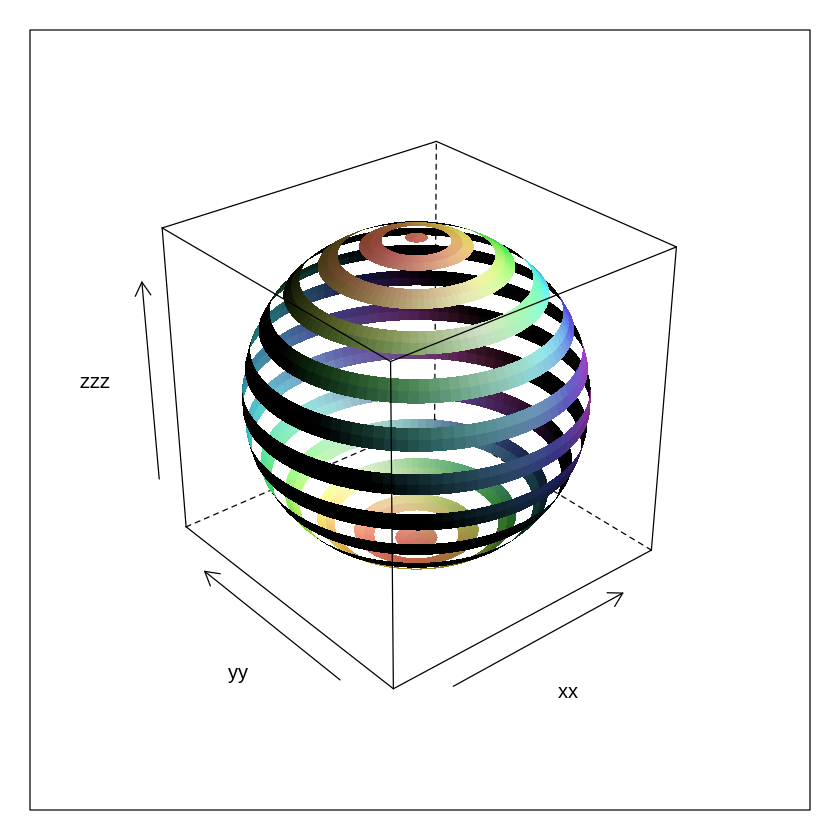


> ## non-trivial strip function
> 
> barchart(variety ~ yield | year * site, barley, origin = 0,
+          layout = c(4, 3),
+          between = list(x = c(0, 0.5, 0)),
+          ## par.settings = list(clip = list(strip = "on")),
+          strip =
+          function(which.given,
+                   which.panel,
+                   factor.levels,
+                   bg = trellis.par.get("strip.background")$col[which.given],
+                   ...) {
+              axis.line <- trellis.par.get("axis.line")
+              pushViewport(viewport(clip = trellis.par.get("clip")$strip,
+                                    name = trellis.vpname("strip")))
+              if (which.given == 1)
+              {
+                  grid.rect(x = .26, just = "right",
+                            name = trellis.grobname("fill", type="strip"),
+                            gp = gpar(fill = bg, col = "transparent"))
+                  ltext(factor.levels[which.panel[which.given]],
+               

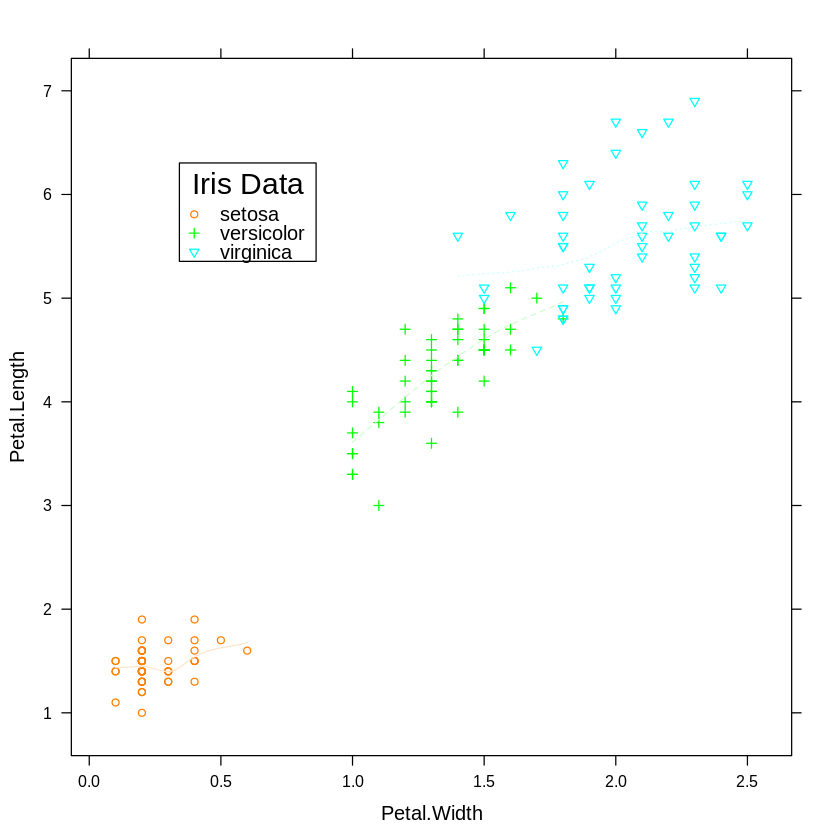


> trellis.par.set(theme = old.settings, strict = 2)

> devAskNewPage(old.prompt)


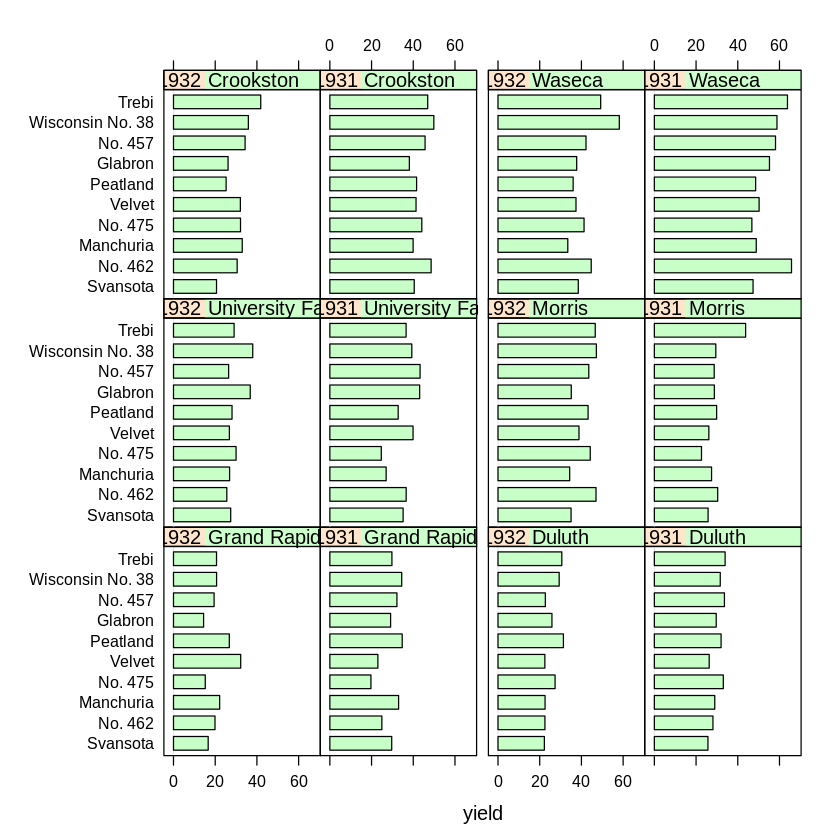

In [4]:
demo(lattice)

## Packages that are widely used

### See [https://awesome-r.com/index.html](https://awesome-r.com/index.html) for a great website with the latest and most used R packages

    Examples of some R packages
    
* tidyverse (A collection of packages that work together for data manipulation and representation ([https://github.com/tidyverse/tidyverse](https://github.com/tidyverse/tidyverse)
    * ggplot2 (graphics)
    * dplyr (data manipulation)
    * tydr (data tyding)
* data.table (for fast importing, processing and manipulation of files (csv,txt, others))
* foreign (data conversion from common statistical packages stata, SPSS, SAS, others)

#### Packages for biomedical research

* Cluster (cluster analysis)


## Next [Importing data](./3.Importing_data.ipynb) 